Imbalanced classification are those prediction tasks where the distribution of examples across class labels is not equal. Most imbalanced classification examples focus on binary classification tasks, yet many of the tools and techniques for imbalanced classification also directly support multi-class classification problems.

In this tutorial, we will learn how to use the tools of imbalanced classification with multi-class datasets.

In [1]:
import imblearn
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 

from collections import Counter
from sklearn.preprocessing import LabelEncoder

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import SVMSMOTE
from imblearn.over_sampling import ADASYN
from imblearn.pipeline import Pipeline

%matplotlib inline

We will be using a dataset for glass identification. The dataset describes the chemical properties of glass and involves classifying samples of glass using their chemical properties as one of six classes. Ignoring the sample identification number, there are nine input variables that summarize the properties of the glass dataset; they are: RI (Refractive Index), Na (Sodium), Mg (Magnesium), Al (Aluminum), Si (Silicon), K (Potassium), Ca (Calcium), Ba (Barium), Fe (Iron). The chemical compositions are measured as the weight percent in corresponding oxide.

There are seven types of glass listed; they are:
   - Class 1: building windows (float processed)
   - Class 2: building windows (non-float processed)
   - Class 3: vehicle windows (float processed)
   - Class 4: vehicle windows (non-float processed)
   - Class 5: containers
   - Class 6: tableware
   - Class 7: headlamps
   
Float glass refers to the process used to make the glass. Float glass is a sheet of glass made by floating molten glass on a bed of molten metal, typically tin, although lead and other various low-melting-point alloys were used in the past. This method gives the sheet uniform thickness and very flat surfaces. Modern windows are made from float glass. The float glass process is also known as the Pilkington process, named after the British glass manufacturer Pilkington, which pioneered the technique in the 1950s.

There are 214 observations in the dataset and the number of observations in each class is imbalanced. Note that there are no examples for class 4 (non-float processed vehicle windows) in the dataset:
   - Class 1: 70 examples
   - Class 2: 76 examples
   - Class 3: 17 examples
   - Class 4: 0 examples
   - Class 5: 13 examples
   - Class 6: 9 examples
   - Class 7: 29 examples
   
The dataset can be divided into window glass (classes 1-4) and non-window glass (classes 5-7). There are 163 examples of window glass and 51 examples of non-window glass. Another division of the observations would be between float processed glass and non-float processed glass, in the case of window glass only. This division is more balance (87 float glass vs. 76 non-float glass). The dataset can be retrieved from an URL. 

In [9]:
os.chdir("C:\\Users\\GAO\\GAO_Jupyter_Notebook\\Datasets")
print(imblearn.__version__)

warnings.filterwarnings("ignore")

0.7.0


In [3]:
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/glass.csv'
df = pd.read_csv(url, header=None)
data = df.values
X, y = data[:, :-1], data[:, -1] # splitting into input and output elements
y = LabelEncoder().fit_transform(y) # label-encoding the target variable

Class=0, n=70 (32.710%)
Class=1, n=76 (35.514%)
Class=2, n=17 (7.944%)
Class=3, n=13 (6.075%)
Class=4, n=9 (4.206%)
Class=5, n=29 (13.551%)


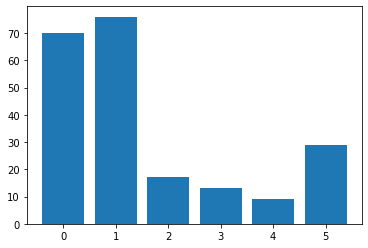

In [4]:
counter = Counter(y)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
plt.bar(counter.keys(), counter.values())
plt.show()

Next, we can apply SMOTE to oversample the dataset. By default, SMOTE will oversample all classes to have the same number of examples as the class with the most examples. In this case, class 1 has the most examples with 76, therefore, SMOTE will oversample all classes to have 76 examples.

Class=0, n=76 (16.667%)
Class=1, n=76 (16.667%)
Class=2, n=76 (16.667%)
Class=3, n=76 (16.667%)
Class=4, n=76 (16.667%)
Class=5, n=76 (16.667%)


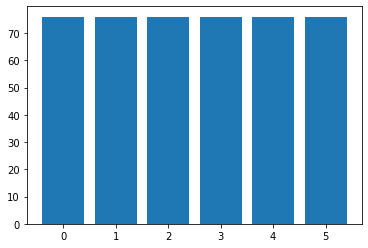

In [5]:
oversample = SMOTE()
X1, y1 = oversample.fit_resample(X, y)
counter = Counter(y1)
for k,v in counter.items():
    per = v / len(y1) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
plt.bar(counter.keys(), counter.values())
plt.show()

This is not the only way you can do the over-sampling. Instead of using the default strategy of SMOTE to oversample all classes to the number of examples in the majority class, we could instead specify the number of examples to oversample in each class.

For example, we could oversample to 100 examples in classes 0 and 1 and 200 examples in remaining classes. This can be achieved by creating a dictionary that maps class labels to the number of desired examples in each class, then specifying this via the “sampling_strategy” argument to the SMOTE class:

Class=0, n=100 (10.000%)
Class=1, n=100 (10.000%)
Class=2, n=200 (20.000%)
Class=3, n=200 (20.000%)
Class=4, n=200 (20.000%)
Class=5, n=200 (20.000%)


C:\ProgramData\Anaconda3\lib\site-packages\imblearn\utils\_validation.py:326: UserWarning: After over-sampling, the number of samples (100) in class 0 will be larger than the number of samples in the majority class (class #1 -> 76)
  n_samples_majority,
C:\ProgramData\Anaconda3\lib\site-packages\imblearn\utils\_validation.py:326: UserWarning: After over-sampling, the number of samples (100) in class 1 will be larger than the number of samples in the majority class (class #1 -> 76)
  n_samples_majority,
C:\ProgramData\Anaconda3\lib\site-packages\imblearn\utils\_validation.py:326: UserWarning: After over-sampling, the number of samples (200) in class 2 will be larger than the number of samples in the majority class (class #1 -> 76)
  n_samples_majority,
C:\ProgramData\Anaconda3\lib\site-packages\imblearn\utils\_validation.py:326: UserWarning: After over-sampling, the number of samples (200) in class 3 will be larger than the number of samples in the majority class (class #1 -> 76)
  n_sa

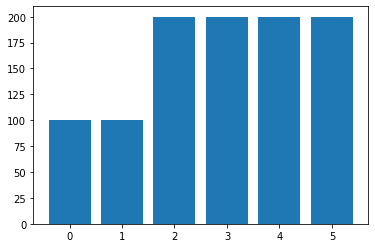

In [6]:
strategy = {0:100, 1:100, 2:200, 3:200, 4:200, 5:200}
oversample = SMOTE(sampling_strategy=strategy)
X2, y2 = oversample.fit_resample(X, y)
counter = Counter(y2)
for k,v in counter.items():
    per = v / len(y2) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
plt.bar(counter.keys(), counter.values())
plt.show()

There are also extensions of the SMOTE algorithm like how we do for binary SMOTE, for example:

C:\ProgramData\Anaconda3\lib\site-packages\imblearn\utils\_validation.py:326: UserWarning: After over-sampling, the number of samples (100) in class 0 will be larger than the number of samples in the majority class (class #1 -> 76)
  n_samples_majority,
C:\ProgramData\Anaconda3\lib\site-packages\imblearn\utils\_validation.py:326: UserWarning: After over-sampling, the number of samples (100) in class 1 will be larger than the number of samples in the majority class (class #1 -> 76)
  n_samples_majority,
C:\ProgramData\Anaconda3\lib\site-packages\imblearn\utils\_validation.py:326: UserWarning: After over-sampling, the number of samples (200) in class 2 will be larger than the number of samples in the majority class (class #1 -> 76)
  n_samples_majority,
C:\ProgramData\Anaconda3\lib\site-packages\imblearn\utils\_validation.py:326: UserWarning: After over-sampling, the number of samples (200) in class 3 will be larger than the number of samples in the majority class (class #1 -> 76)
  n_sa

Class=0, n=100 (10.000%)
Class=1, n=100 (10.000%)
Class=2, n=200 (20.000%)
Class=3, n=200 (20.000%)
Class=4, n=200 (20.000%)
Class=5, n=200 (20.000%)


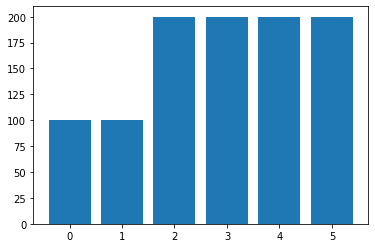

In [7]:
borderline_sm = BorderlineSMOTE(sampling_strategy=strategy)
X3, y3 = borderline_sm.fit_resample(X, y)
counter = Counter(y3)
for k,v in counter.items():
    per = v / len(y3) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
plt.bar(counter.keys(), counter.values())
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\imblearn\utils\_validation.py:326: UserWarning: After over-sampling, the number of samples (100) in class 0 will be larger than the number of samples in the majority class (class #1 -> 76)
  n_samples_majority,
C:\ProgramData\Anaconda3\lib\site-packages\imblearn\utils\_validation.py:326: UserWarning: After over-sampling, the number of samples (100) in class 1 will be larger than the number of samples in the majority class (class #1 -> 76)
  n_samples_majority,
C:\ProgramData\Anaconda3\lib\site-packages\imblearn\utils\_validation.py:326: UserWarning: After over-sampling, the number of samples (200) in class 2 will be larger than the number of samples in the majority class (class #1 -> 76)
  n_samples_majority,
C:\ProgramData\Anaconda3\lib\site-packages\imblearn\utils\_validation.py:326: UserWarning: After over-sampling, the number of samples (200) in class 3 will be larger than the number of samples in the majority class (class #1 -> 76)
  n_sa

Class=0, n=100 (12.107%)
Class=1, n=100 (12.107%)
Class=2, n=108 (13.075%)
Class=3, n=200 (24.213%)
Class=4, n=118 (14.286%)
Class=5, n=200 (24.213%)


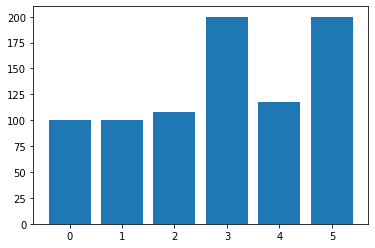

In [8]:
borderline_svm = SVMSMOTE(sampling_strategy=strategy)
X4, y4 = borderline_svm.fit_resample(X, y)
counter = Counter(y4)
for k,v in counter.items():
    per = v / len(y4) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
plt.bar(counter.keys(), counter.values())
plt.show()

Notice that SVMSMOTE() does not fully respect the sampling strategy because of the nature of the algorithm.

References:
   - https://machinelearningmastery.com/multi-class-imbalanced-classification/
   - https://raw.githubusercontent.com/jbrownlee/Datasets/master/glass.csv
   - https://raw.githubusercontent.com/jbrownlee/Datasets/master/glass.names